In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(r"C:\Users\online\OneDrive\Desktop\Data analysis\Datasets\diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [27]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [28]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(146)

In [7]:
df  = df.drop_duplicates()

In [30]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [33]:
df.rename(columns={'x':'length','y':'width','z':'depth/height'},inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,length,width,depth/height,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [34]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [35]:
cut_counts = df['cut'].value_counts()
cut_counts

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [36]:
c = cut_counts.index

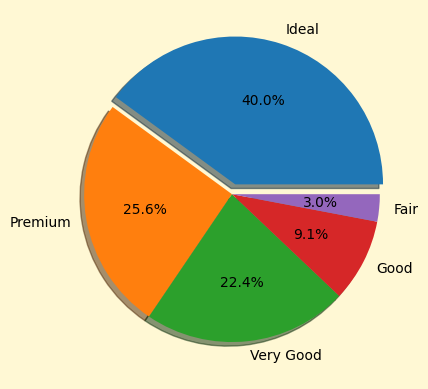

In [37]:
plt.figure(facecolor='#FFF8D4')
plt.pie(cut_counts , labels=c , autopct='%1.1f%%', shadow=True, explode=(0.07,0.0,0.0,0.0,0.0))
plt.show()

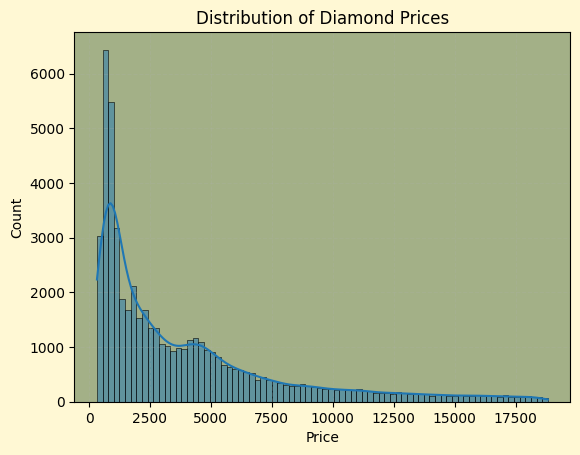

In [38]:
plt.figure(facecolor='#FFF8D4')
sns.histplot(x = 'price', data=df ,  kde=True)
plt.title("Distribution of Diamond Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.gca().set_facecolor('#A3B087')
plt.grid(True , linestyle = '--' , alpha = 0.2)
plt.show()


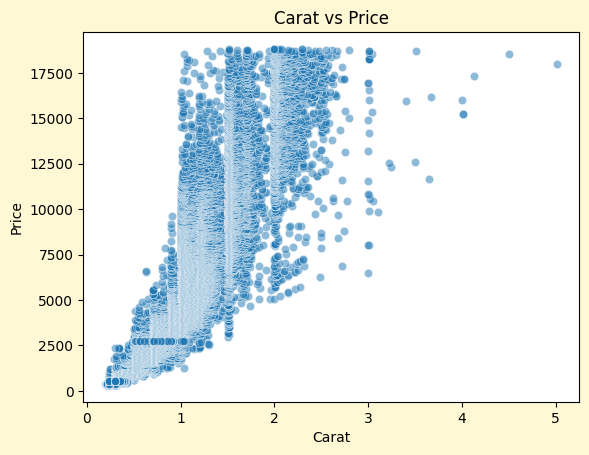

In [39]:
plt.figure(facecolor='#FFF8D4')
sns.scatterplot(data=df, x="carat", y="price", alpha=0.5)
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()


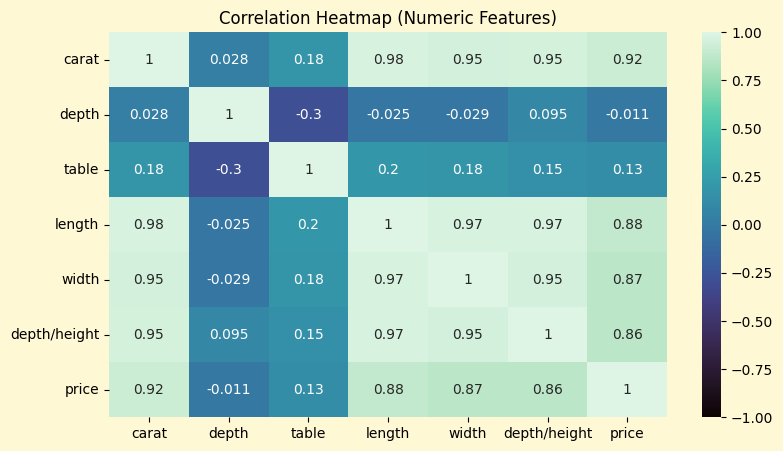

In [40]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
corr = numeric_cols.corr()

plt.figure(figsize=(9,5), facecolor='#FFF8D4')
sns.heatmap(corr, annot=True, cmap = 'mako', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [41]:
avg_price_cut = df.groupby('cut')['price'].mean()
avg_price_cut

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

C:\Users\online\AppData\Local\Temp\ipykernel_13044\696704585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_cut.index, y=avg_price_cut.values , palette='mako')


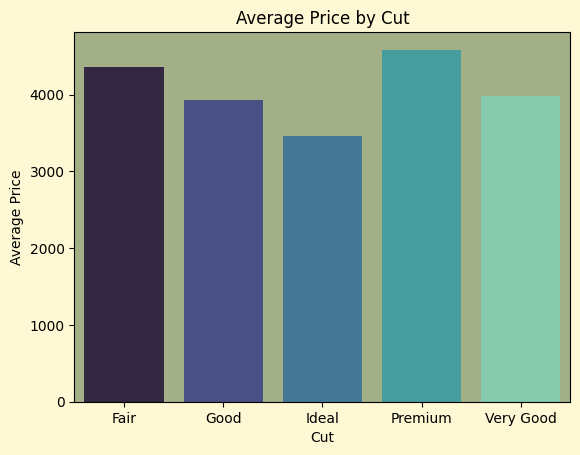

In [42]:
plt.figure(facecolor='#FFF8D4')
sns.barplot(x=avg_price_cut.index, y=avg_price_cut.values , palette='mako')
plt.title("Average Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Average Price")
plt.gca().set_facecolor('#A3B087')
plt.show()

In [50]:
avg_price_clarity = df.groupby('clarity')['price'].mean()
avg_price_clarity

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64

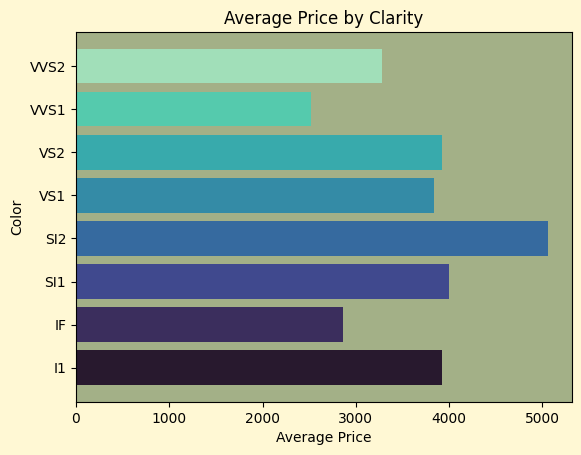

In [52]:
plt.figure(facecolor='#FFF8D4')
plt.barh(avg_price_clarity.index , avg_price_clarity.values, color=sns.color_palette('mako', len(avg_price_clarity)))
plt.title("Average Price by Clarity")
plt.xlabel("Average Price")
plt.ylabel("Color")
plt.gca().set_facecolor('#A3B087')
plt.show()

C:\Users\online\AppData\Local\Temp\ipykernel_13044\2231774428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(data=df, x="cut" , palette='mako' , width=0.6)


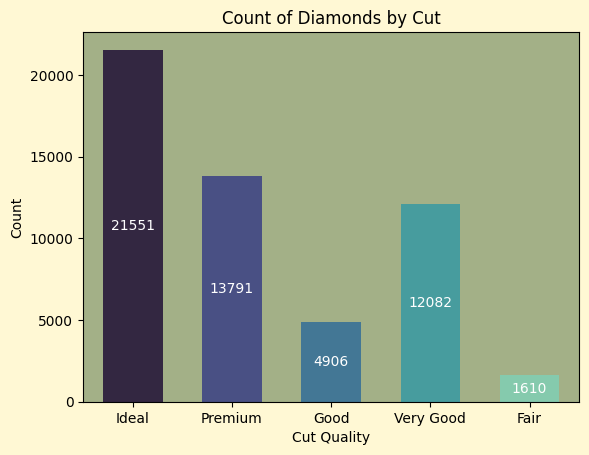

In [45]:
plt.figure(facecolor='#FFF8D4')
a = sns.countplot(data=df, x="cut" , palette='mako' , width=0.6)
plt.title("Count of Diamonds by Cut")
plt.xlabel("Cut Quality")
plt.ylabel("Count")
for i in a.containers:
    a.bar_label(i, label_type='center' ,color = 'w' )
plt.gca().set_facecolor('#A3B087')
plt.show()

C:\Users\online\AppData\Local\Temp\ipykernel_13044\2151547456.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="color", y="price" , showfliers=False , palette='mako', width=0.6)


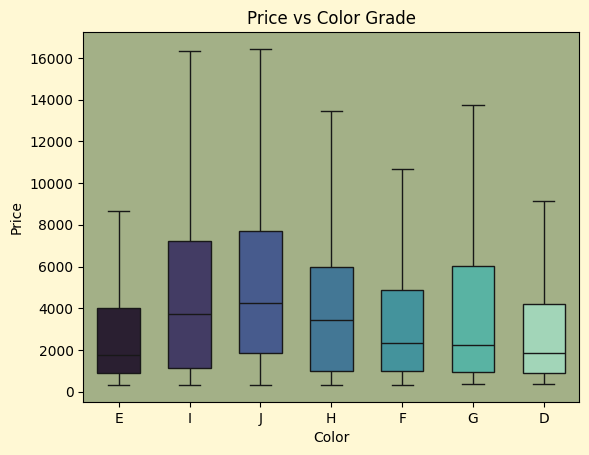

In [46]:
plt.figure(facecolor='#FFF8D4')
sns.boxplot(data=df, x="color", y="price" , showfliers=False , palette='mako', width=0.6)
plt.title("Price vs Color Grade")
plt.xlabel("Color")
plt.ylabel("Price")
plt.gca().set_facecolor('#A3B087')
plt.show()

C:\Users\online\AppData\Local\Temp\ipykernel_13044\3410363728.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_cut.index, y=avg_price_cut.values , palette='mako')
C:\Users\online\AppData\Local\Temp\ipykernel_13044\3410363728.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="color", y="price" , showfliers=False , palette='viridis', width=0.6)


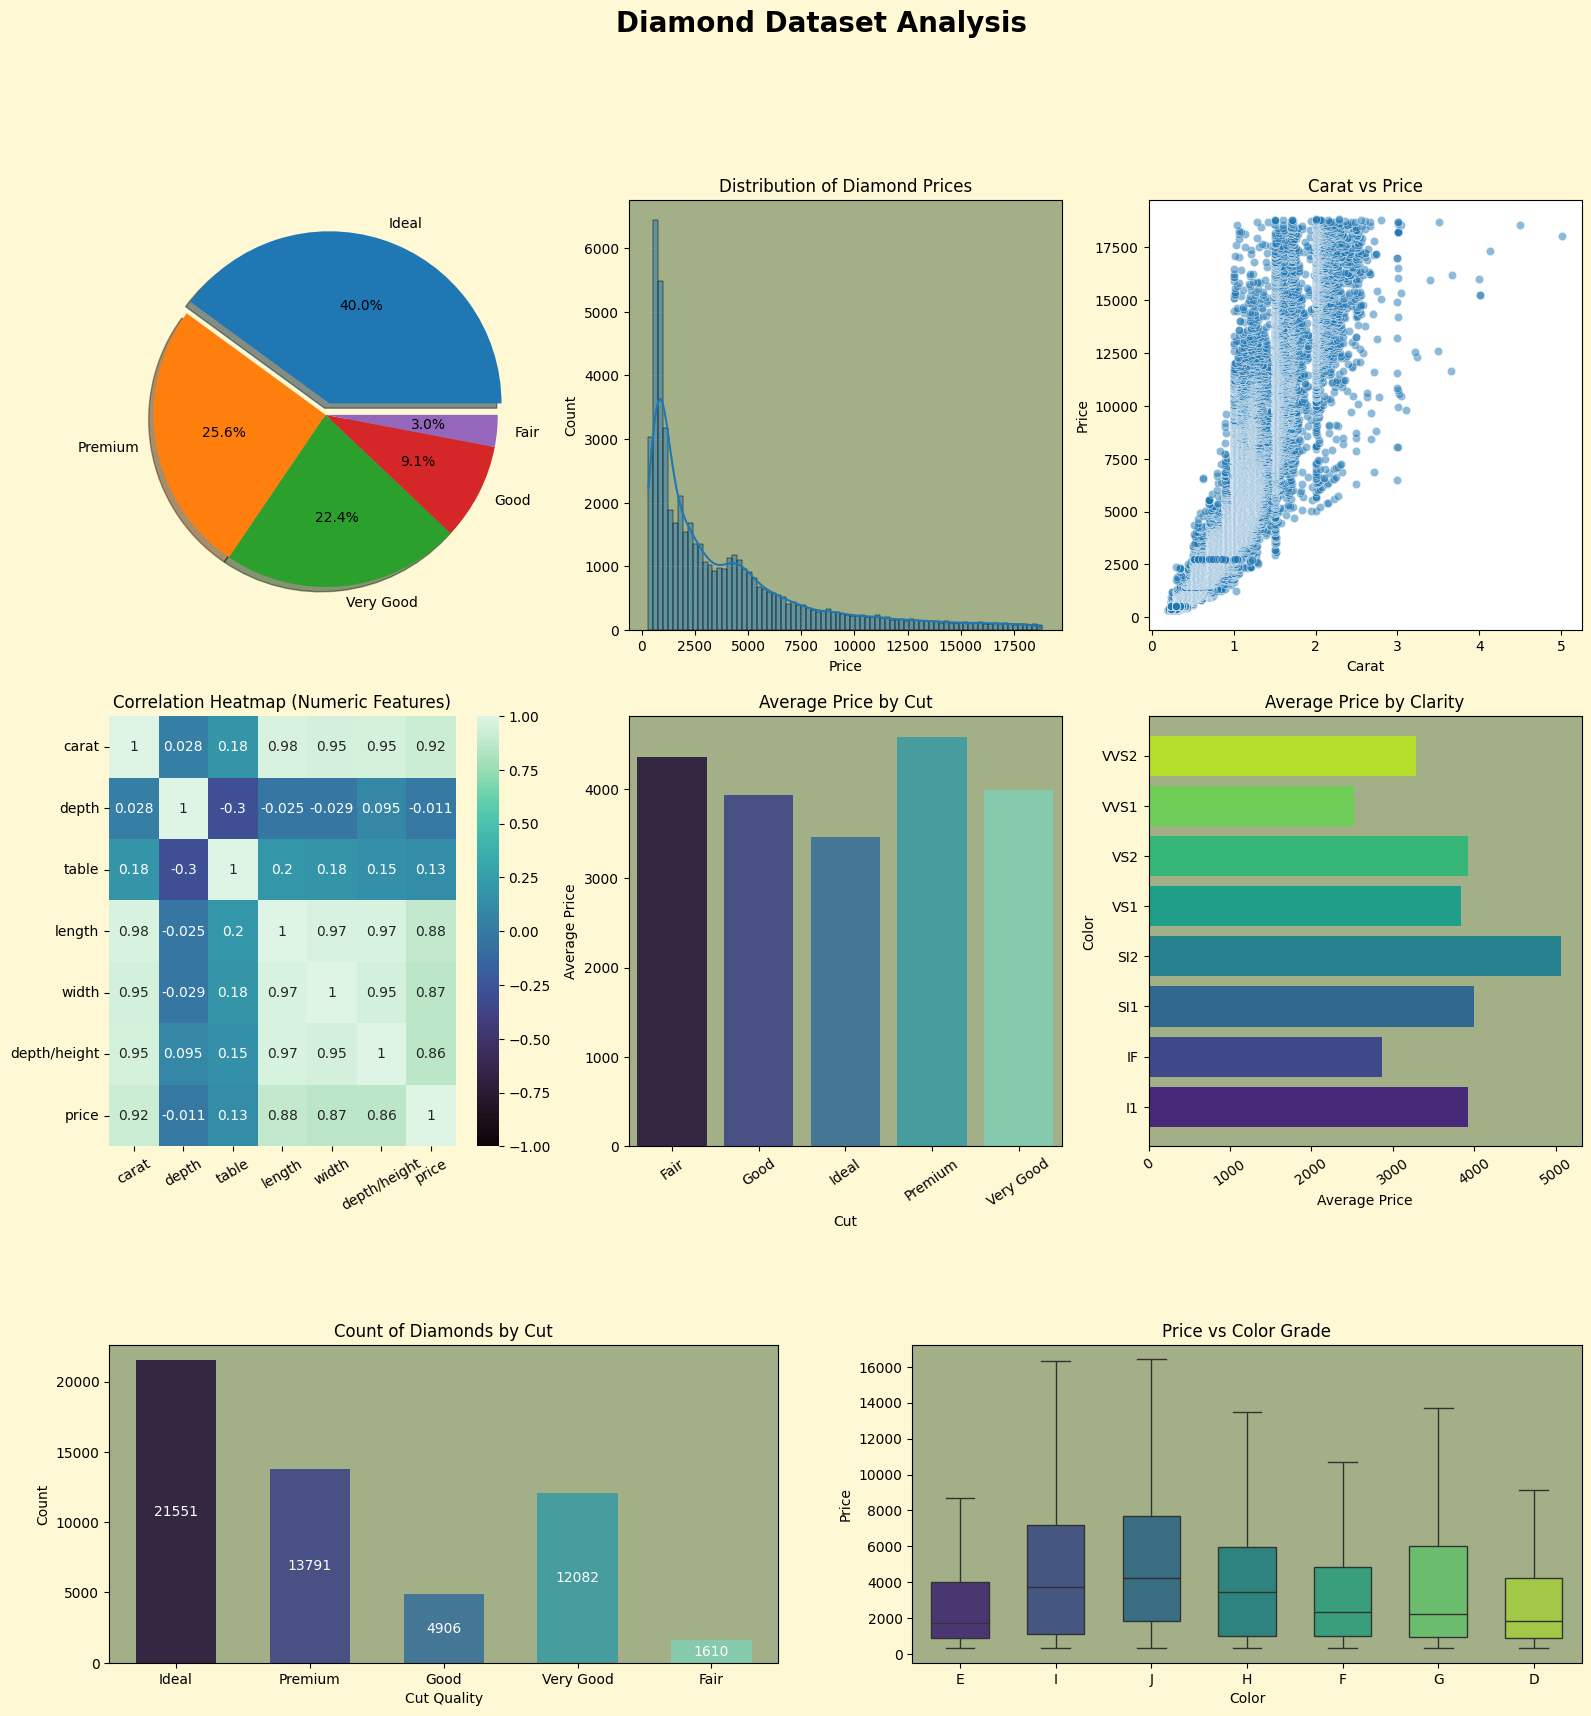

In [ ]:
plt.figure(figsize=(19,19) , facecolor='#FFF8D4')
plt.suptitle("Diamond Dataset Analysis", fontsize=20, fontweight='bold')
plt.subplot(3,3,1)
plt.pie(cut_counts , labels=c , autopct='%1.1f%%', shadow=True, explode=(0.07,0.0,0.0,0.0,0.0))

plt.subplot(3,3,2)
sns.histplot(x = 'price', data=df ,  kde=True)
plt.title("Distribution of Diamond Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.gca().set_facecolor('#A3B087')
plt.grid(True , linestyle = '--' , alpha = 0.2)

plt.subplot(3,3,3)
sns.scatterplot(data=df, x="carat", y="price", alpha=0.5)
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price")

plt.subplot(3,3,4)
numeric_cols = df.select_dtypes(include=["int64", "float64"])
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap = 'mako', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Numeric Features)")
plt.xticks(rotation = 30)

plt.subplot(3,3,5)
sns.barplot(x=avg_price_cut.index, y=avg_price_cut.values , palette='mako')
plt.title("Average Price by Cut")
plt.xlabel("Cut")
plt.ylabel("Average Price")
plt.gca().set_facecolor('#A3B087')
plt.xticks(rotation = 35)

plt.subplot(3,3,6)
plt.barh(avg_price_clarity.index , avg_price_clarity.values, color=sns.color_palette('viridis', len(avg_price_clarity)))
plt.title("Average Price by Clarity")
plt.xlabel("Average Price")
plt.ylabel("Color")
plt.gca().set_facecolor('#A3B087')
plt.xticks(rotation = 35)

plt.subplot(4,2,7)
a = sns.countplot(data=df, x="cut" , palette='mako' , width=0.6)
plt.title("Count of Diamonds by Cut")
plt.xlabel("Cut Quality")
plt.ylabel("Count")
for i in a.containers:
    a.bar_label(i, label_type='center' ,color = 'w' )
plt.gca().set_facecolor('#A3B087')

plt.subplot(4,2,8)
sns.boxplot(data=df, x="color", y="price" , showfliers=False , palette='viridis', width=0.6)
plt.title("Price vs Color Grade")
plt.xlabel("Color")
plt.ylabel("Price")
plt.gca().set_facecolor('#A3B087')

plt.show()

